# LOADING LIBRARIES

In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[2]:

#import matplotlib.pyplot as plt
#import numpy as np
import pandas as pd
#import networkx as nx
#import csv
#from sys import stdin
#from networkx.algorithms.community import greedy_modularity_communities
#from networkx.algorithms.community import k_clique_communities
#from networkx.algorithms.community import asyn_lpa_communities
#from networkx.algorithms.community import modularity
#from cdlib import algorithms, readwrite, viz
#from sklearn.manifold import TSNE
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegressionCV
#from sklearn.metrics import accuracy_score
#from gensim.models import Word2Vec
from sklearn import preprocessing
import sklearn.metrics as sk_metrics
#import seaborn as sns

#################
def fixed_metrics(y,y_pred):
    from sklearn import metrics
    import pandas as pd
    import sklearn.metrics as sk_metrics
    

    cm = sk_metrics.confusion_matrix(y, y_pred)

    results_partial = y.copy()
    results_partial=pd.DataFrame(results_partial)
    results_partial["pred"] = y_pred
    results_partial = results_partial[(results_partial.iloc[:,0]<1)]
    
    alfa = sum(results_partial["pred"])/results_partial.shape[0]
    beta = 1
    
    fpr, tpr, thresholds = metrics.roc_curve(y, y_pred, pos_label=1)

    
    TN = cm[0,0]
    FN = cm[1,0]
    TP = cm[1,1]
    FP = cm[0,1]
    
    theta = (TP+FP)/(TP+FN+TN+FP)
    n=FP/(TN+FP)
    #pi = (TP+FN)/(TP+FN+TN+FP)
    c= len(y[(y.iloc[:,0]==1)])/(len(y[(y.iloc[:,0]==1)])+len(y[(y.iloc[:,0]==0)]))
    gamma = TP/(TP+FN)
    if beta-alfa==0:
        gamma_cr = float('inf')
        n_cr = float('inf')
    else:
        gamma_cr = ((beta-alfa)**-1)*((1-alfa)*gamma-(1-beta)*n)
        n_cr = ((beta-alfa)**-1)*((beta*n)-(alfa*gamma))
        
    pi_cr = (c*beta)+((1-c)*alfa)
    ##metrics
    ACC_cr = (pi_cr*gamma_cr) + ((1-pi_cr)*(1-n_cr))
    bacc_cr = (1 + (gamma_cr - n_cr))/2
    f_cr = (2*pi_cr*gamma_cr)/(pi_cr+theta)
    mcc_cr = (pi_cr*(1-pi_cr)/theta*(1-theta))*(gamma_cr-n_cr)
    
    auc_r = metrics.auc(fpr, tpr)
    auc_cr = (auc_r-(1-(beta-alfa)))/(beta-alfa)
    alfa = sum(results_partial["pred"])/results_partial.shape[0]
    
    metrics_df =[[auc_r,auc_cr,ACC_cr,bacc_cr,f_cr,mcc_cr,alfa]]
    return(metrics_df)


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# roc curve for logistic regression model with optimal threshold
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# threshold prom unweighted


In [3]:
filename = "D:/REPO_GITHUB/ALUMINUM_GENES_CLASSIFICATION/ENSEMBLE/JJG/CANDIDATES_JJG_ENSEMBLE_WEIGHTED_ALL.xlsx"
#filename = "/users/ccsosaa/pecanpy/BIG_COMP_W.emb"
data=pd.read_excel(filename,index_col=0)
print(data)

                status  prob_svm  prob_lda   prob_rf   prob_LP  \
genes                                                            
LOC_Os03g50290       0  0.501694  0.473465  0.537439  0.000000   
LOC_Os04g38870       0  0.501601  0.569725  0.489644  0.000000   
LOC_Os08g33370       0  0.501769  0.517468  0.522299  0.000000   
LOC_Os08g37490       0  0.502012  0.576035  0.525786  0.000000   
LOC_Os02g36974       0  0.502298  0.466111  0.507616  0.000000   
...                ...       ...       ...       ...       ...   
LOC_Os05g37130       0  0.512387  0.491250  0.522381  0.486625   
LOC_Os04g45020       0  0.555368  0.416236  0.494323  0.310911   
LOC_Os02g11870       0  0.570674  0.509756  0.486288  0.298337   
LOC_Os01g43050       0  0.574949  0.366623  0.549982  0.298801   
LOC_Os05g41160       0  0.531696  0.396774  0.506490  0.460786   

                prob_ADA_logit  prob_ADA_lda  prob_ADA_svm  PROM_PROB_PULEARN  \
genes                                                       

# PULEARN

In [4]:
# roc curve for logistic regression model with optimal threshold
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(data["status"], data["PROM_PROB_PULEARN"])

Best Threshold=0.652798, G-Mean=0.995


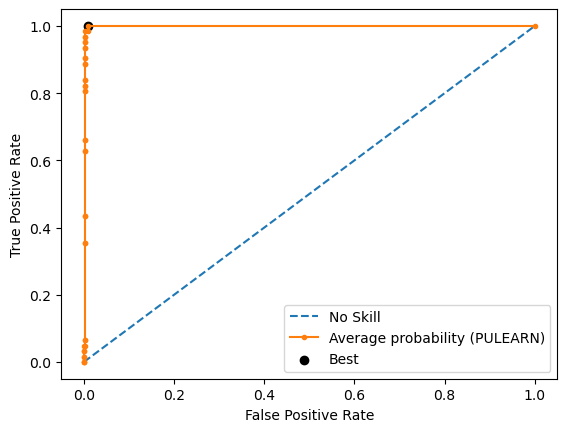

In [5]:
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Average probability (PULEARN)')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [6]:
for i in range(len(data["ENSEMBLE_PULEARN"])):
    if data["PROM_PROB_PULEARN"][i] > thresholds[ix]:
        data["ENSEMBLE_PULEARN"][i] = 1
    else:
        data["ENSEMBLE_PULEARN"][i] = 0


C:\Users\cami_\AppData\Local\Temp\ipykernel_11212\2986860982.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ENSEMBLE_PULEARN"][i] = 0
C:\Users\cami_\AppData\Local\Temp\ipykernel_11212\2986860982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ENSEMBLE_PULEARN"][i] = 1


In [7]:
y = data["status"]
y = y.to_frame()
y_pred = data["ENSEMBLE_PULEARN"]
y_pred = y_pred.to_frame()
fixed_SVM = fixed_metrics(y,y_pred)
print("AUC","AUCcr","ACCURACY","B_ACCURACY","F","MCC","ALPHA")
print(fixed_SVM)

AUC AUCcr ACCURACY B_ACCURACY F MCC ALPHA
[[0.9871294719870111, 0.9870045595040898, 0.9996330055348756, 0.9918572152302236, 0.9860428683329772, 0.962257297440993, 0.009612023767913317]]


# ADASAMPLING

In [8]:
# roc curve for logistic regression model with optimal threshold
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(data["status"], data["PROM_PROB_ADASAMPLING"])

Best Threshold=0.516945, G-Mean=0.710


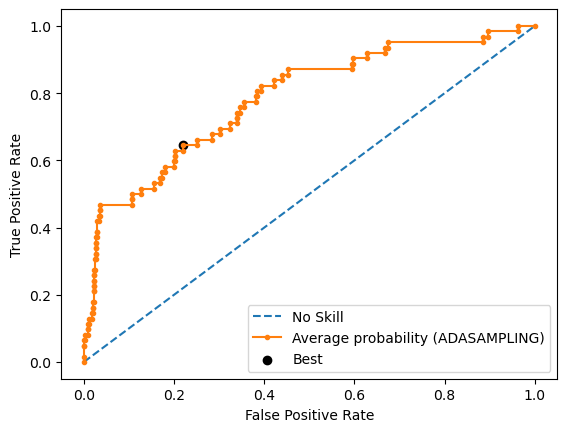

In [9]:
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Average probability (ADASAMPLING)')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [10]:
for i in range(len(data["ENSEMBLE_ADASAMPLING"])):
    if data["PROM_PROB_ADASAMPLING"][i] > thresholds[ix]:
        data["ENSEMBLE_ADASAMPLING"][i] = 1
    else:
        data["ENSEMBLE_ADASAMPLING"][i] = 0


C:\Users\cami_\AppData\Local\Temp\ipykernel_11212\4044284437.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ENSEMBLE_ADASAMPLING"][i] = 0
C:\Users\cami_\AppData\Local\Temp\ipykernel_11212\4044284437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ENSEMBLE_ADASAMPLING"][i] = 1


In [11]:
y = data["status"]
y = y.to_frame()
y_pred = data["ENSEMBLE_ADASAMPLING"]
y_pred = y_pred.to_frame()
fixed_SVM = fixed_metrics(y,y_pred)
print("AUC","AUCcr","ACCURACY","B_ACCURACY","F","MCC","ALPHA")
print(fixed_SVM)

AUC AUCcr ACCURACY B_ACCURACY F MCC ALPHA
[[0.7049681854227974, 0.6221920082780857, 0.836694952702652, 0.7624754845928938, 0.6309301646545048, 0.32029331028151514, 0.21909588721892112]]


# ALL

In [12]:
# roc curve for logistic regression model with optimal threshold
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(data["status"], data["PROM_PROB_ALL"])

Best Threshold=0.561670, G-Mean=0.992


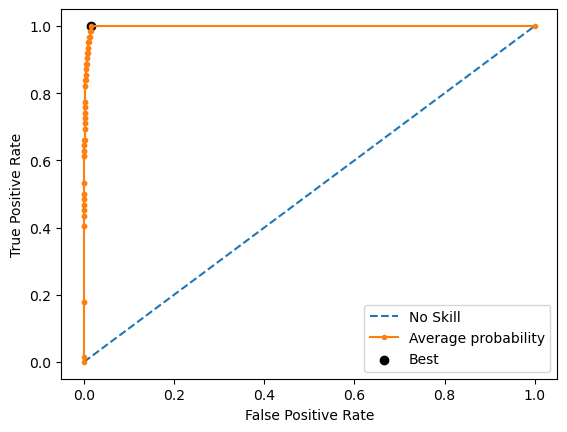

In [13]:
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Average probability')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [14]:
for i in range(len(data["ENSEMBLE_PROM"])):
    if data["PROM_PROB_ALL"][i] > thresholds[ix]:
        data["ENSEMBLE_PROM"][i] = 1
    else:
        data["ENSEMBLE_PROM"][i] = 0


C:\Users\cami_\AppData\Local\Temp\ipykernel_11212\287229893.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ENSEMBLE_PROM"][i] = 0
C:\Users\cami_\AppData\Local\Temp\ipykernel_11212\287229893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ENSEMBLE_PROM"][i] = 1


In [15]:
y = data["status"]
y = y.to_frame()
y_pred = data["ENSEMBLE_PROM"]
y_pred = y_pred.to_frame()
fixed_SVM = fixed_metrics(y,y_pred)
print("AUC","AUCcr","ACCURACY","B_ACCURACY","F","MCC","ALPHA")
print(fixed_SVM)

AUC AUCcr ACCURACY B_ACCURACY F MCC ALPHA
[[0.983779827340617, 0.9835108679455781, 0.9994176771497263, 0.9918017598086599, 0.9853114816039297, 0.947766520405815, 0.016311313060701386]]


### SAVING RESULTS

In [16]:
"""
data["PRED_PULEARN"] = data["status"]
for i in range(len(data["PRED_PULEARN"])):
    if data["PROM_PROB_PULEARN"][i] > 0.611762:
        data["PRED_PULEARN"][i] = 1
    else:
        data["PRED_PULEARN"][i] = 0

"""


'\ndata["PRED_PULEARN"] = data["status"]\nfor i in range(len(data["PRED_PULEARN"])):\n    if data["PROM_PROB_PULEARN"][i] > 0.611762:\n        data["PRED_PULEARN"][i] = 1\n    else:\n        data["PRED_PULEARN"][i] = 0\n\n'

In [17]:
"""data["PRED_ADASAMPLING"] = data["status"]
for i in range(len(data["PRED_ADASAMPLING"])):
    if data["PROM_PROB_ADASAMPLING"][i] > 0.550387:
        data["PRED_ADASAMPLING"][i] = 1
    else:
        data["PRED_ADASAMPLING"][i] = 0
"""

'data["PRED_ADASAMPLING"] = data["status"]\nfor i in range(len(data["PRED_ADASAMPLING"])):\n    if data["PROM_PROB_ADASAMPLING"][i] > 0.550387:\n        data["PRED_ADASAMPLING"][i] = 1\n    else:\n        data["PRED_ADASAMPLING"][i] = 0\n'

In [18]:
"""
data["PRED_ALL"] = data["status"]
for i in range(len(data["PRED_ALL"])):
    if data["PROM_PROB_ALL"][i] > 0.521705:
        data["PRED_ALL"][i] = 1
    else:
        data["PRED_ALL"][i] = 0
"""

'\ndata["PRED_ALL"] = data["status"]\nfor i in range(len(data["PRED_ALL"])):\n    if data["PROM_PROB_ALL"][i] > 0.521705:\n        data["PRED_ALL"][i] = 1\n    else:\n        data["PRED_ALL"][i] = 0\n'

In [19]:
data.to_excel(filename, sheet_name="WEIGHTED")